In [10]:
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras import Model
import numpy as np


### Example data load

In [2]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Week9/ThoraricSurgery.csv'
#Data = np.loadtxt('ThoraricSurgery.csv', delimiter=',')
Data = np.loadtxt(url, delimiter=',')

### Splitting data into input and output

In [3]:
X = Data[:, :17]
Y = Data[:, 17]
X.shape, Y.shape

((470, 17), (470,))

### Functional API

In [20]:
## Input layer with 17 features
InpLayer = Input(shape=(X.shape[-1]), name='Inp')
InpLayer

<KerasTensor: shape=(None, 17) dtype=float32 (created by layer 'Inp')>

In [21]:
## Hidden layer 1 with a 2D wiegh matrix (17 , 10) and a 2D bias matrix (1, 10)
HL1 = Dense(10, activation='relu', name='HL1')(InpLayer)
HL1

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'HL1')>

In [22]:
### Alternative approach
HL1 = Dense(10, activation='relu', name='HL1')
HL1 = HL1(InpLayer)
HL1

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'HL1')>

In [23]:
## Concatenating InpLayer and HD2 to generate HD3
HL2 = Concatenate(axis=1, name='HL2')([InpLayer, HL1])
HL2

<KerasTensor: shape=(None, 27) dtype=float32 (created by layer 'HL2')>

In [24]:
## Hidden layer 3 with a 2D wiegh matrix (27 , 5) and a 2D bias matrix (1, 5)
HL3 = Dense(5, activation='relu', name='HL3')(HL2)
HL3

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'HL3')>

In [25]:
## Output layer a 2D wiegh matrix (5 , 1) and a 2D bias matrix (1, 1)
Out = Dense(1, activation='sigmoid', name='Out')(HL3)


In [28]:
### Defining the model by specifying inputs and outputs
model = Model(InpLayer, Out)

In [27]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inp (InputLayer)                [(None, 17)]         0                                            
__________________________________________________________________________________________________
HL1 (Dense)                     (None, 10)           180         Inp[0][0]                        
__________________________________________________________________________________________________
HL2 (Concatenate)               (None, 27)           0           Inp[0][0]                        
                                                                 HL1[0][0]                        
__________________________________________________________________________________________________
HL3 (Dense)                     (None, 5)            140         HL2[0][0]                  

 ### Compliling the model
 #### You need to sepcify the loss function and the optimizer

In [29]:
model.compile(loss='BCE', optimizer='adam')

In [30]:
model.fit(X,Y, validation_split=0.2, epochs=50, batch_size=200)
Logs = model.history.history

Epoch 1/50
2/2 [==============================] - 2s 1s/step - loss: 20.3086 - val_loss: 21.4078
Epoch 2/50
2/2 [==============================] - 0s 30ms/step - loss: 17.2234 - val_loss: 17.7843
Epoch 3/50
2/2 [==============================] - 0s 32ms/step - loss: 14.5216 - val_loss: 14.1686
Epoch 4/50
2/2 [==============================] - 0s 31ms/step - loss: 11.6671 - val_loss: 10.5938
Epoch 5/50
2/2 [==============================] - 0s 31ms/step - loss: 8.6840 - val_loss: 7.0266
Epoch 6/50
2/2 [==============================] - 0s 29ms/step - loss: 5.7197 - val_loss: 3.5406
Epoch 7/50
2/2 [==============================] - 0s 30ms/step - loss: 3.1834 - val_loss: 0.9346
Epoch 8/50
2/2 [==============================] - 0s 29ms/step - loss: 1.2321 - val_loss: 0.7713
Epoch 9/50
2/2 [==============================] - 0s 30ms/step - loss: 0.9398 - val_loss: 1.0782
Epoch 10/50
2/2 [==============================] - 0s 29ms/step - loss: 1.1183 - val_loss: 1.3615
Epoch 11/50
2/2 [======

### Visualization of losses

In [31]:
import matplotlib.pyplot as plt


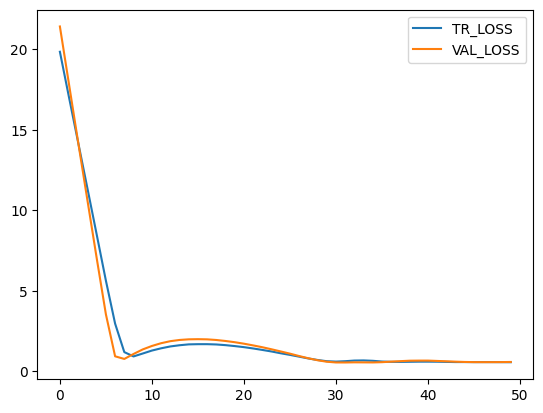

In [32]:
plt.plot(Logs['loss'], label='TR_LOSS')
plt.plot(Logs['val_loss'], label='VAL_LOSS')
plt.legend()